In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import GroupKFold, StratifiedGroupKFold
#import tensorflow as tf
#from tensorflow.keras import layers, models

In [54]:
#load in data set
#df = pd.read_csv("data/features_threshold2.csv")
df = pd.read_csv("data/features_threshold2_with_group.csv")
df

,Subject,Session,Label,Time_Slot,Group,FP1_Delta,FP1_Theta,FP1_Alpha,FP1_Beta,FP1_Gamma,...,O2_Delta,O2_Theta,O2_Alpha,O2_Beta,O2_Gamma,CB2_Delta,CB2_Theta,CB2_Alpha,CB2_Beta,CB2_Gamma
0,1,1,Happy,0.0,1,-3.524575,-3.475727,-3.420962,-3.153212,-3.094105,...,-3.439607,-3.459770,-3.451395,-3.286038,-3.365386,-3.348647,-3.448142,-3.436659,-3.289141,-3.337986
1,1,1,Happy,4.0,1,-3.292785,-3.401251,-3.377746,-3.063091,-3.059503,...,-3.358517,-3.286189,-3.381949,-3.245222,-3.321018,-3.254553,-3.300071,-3.339654,-3.218379,-3.324953
2,1,1,Happy,8.0,1,-3.351697,-3.433848,-3.372632,-3.028414,-2.979703,...,-3.303761,-3.375773,-3.319905,-3.174478,-3.297260,-3.344616,-3.353852,-3.312200,-3.159905,-3.286856
3,1,1,Happy,12.0,1,-3.345868,-3.452308,-3.362542,-3.078246,-3.047646,...,-3.298924,-3.291486,-3.260900,-3.132575,-3.302498,-3.288887,-3.289408,-3.268057,-3.151558,-3.312509
4,1,1,Happy,16.0,1,-3.362545,-3.474593,-3.426952,-3.065244,-3.053964,...,-3.352038,-3.415479,-3.296661,-3.225644,-3.255765,-3.332912,-3.354370,-3.258986,-3.196736,-3.258175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30107,16,3,Disgust,160.0,45,-3.477286,-3.481992,-3.364156,-2.936320,-2.951800,...,-3.368272,-3.618694,-3.483955,-3.288282,-3.268125,-3.369936,-3.619288,-3.486662,-3.285683,-3.263599
30108,16,3,Disgust,164.0,45,-3.503612,-3.476807,-3.323326,-2.933907,-2.949533,...,-3.504770,-3.498274,-3.461674,-3.264564,-3.295100,-3.505706,-3.504029,-3.462277,-3.259018,-3.295507
30109,16,3,Disgust,168.0,45,-3.520455,-3.494451,-3.280831,-2.918250,-2.952944,...,-3.329556,-3.393151,-3.472894,-3.280582,-3.279309,-3.333191,-3.393081,-3.474900,-3.278928,-3.274531
30110,16,3,Disgust,172.0,45,-3.495019,-3.390789,-3.306180,-2.906062,-2.917791,...,-3.523147,-3.542632,-3.537710,-3.288601,-3.272306,-3.520470,-3.540720,-3.542245,-3.288907,-3.274443


In [55]:
#data, label split
data = df.iloc[:,5:]
#labels = df['Label']
data

,FP1_Delta,FP1_Theta,FP1_Alpha,FP1_Beta,FP1_Gamma,FP2_Delta,FP2_Theta,FP2_Alpha,FP2_Beta,FP2_Gamma,...,O2_Delta,O2_Theta,O2_Alpha,O2_Beta,O2_Gamma,CB2_Delta,CB2_Theta,CB2_Alpha,CB2_Beta,CB2_Gamma
0,-3.524575,-3.475727,-3.420962,-3.153212,-3.094105,-3.481234,-3.455794,-3.504263,-3.166035,-3.137420,...,-3.439607,-3.459770,-3.451395,-3.286038,-3.365386,-3.348647,-3.448142,-3.436659,-3.289141,-3.337986
1,-3.292785,-3.401251,-3.377746,-3.063091,-3.059503,-3.428525,-3.390003,-3.347032,-3.090870,-3.119936,...,-3.358517,-3.286189,-3.381949,-3.245222,-3.321018,-3.254553,-3.300071,-3.339654,-3.218379,-3.324953
2,-3.351697,-3.433848,-3.372632,-3.028414,-2.979703,-3.261139,-3.308529,-3.347807,-3.069601,-3.098072,...,-3.303761,-3.375773,-3.319905,-3.174478,-3.297260,-3.344616,-3.353852,-3.312200,-3.159905,-3.286856
3,-3.345868,-3.452308,-3.362542,-3.078246,-3.047646,-3.238791,-3.319652,-3.374896,-3.132018,-3.062585,...,-3.298924,-3.291486,-3.260900,-3.132575,-3.302498,-3.288887,-3.289408,-3.268057,-3.151558,-3.312509
4,-3.362545,-3.474593,-3.426952,-3.065244,-3.053964,-3.304063,-3.440700,-3.411413,-3.087262,-3.109561,...,-3.352038,-3.415479,-3.296661,-3.225644,-3.255765,-3.332912,-3.354370,-3.258986,-3.196736,-3.258175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30107,-3.477286,-3.481992,-3.364156,-2.936320,-2.951800,-3.535205,-3.469398,-3.328274,-2.996771,-2.997064,...,-3.368272,-3.618694,-3.483955,-3.288282,-3.268125,-3.369936,-3.619288,-3.486662,-3.285683,-3.263599
30108,-3.503612,-3.476807,-3.323326,-2.933907,-2.949533,-3.485006,-3.536062,-3.394501,-3.012276,-3.001632,...,-3.504770,-3.498274,-3.461674,-3.264564,-3.295100,-3.505706,-3.504029,-3.462277,-3.259018,-3.295507
30109,-3.520455,-3.494451,-3.280831,-2.918250,-2.952944,-3.452494,-3.471607,-3.363387,-2.952676,-2.982394,...,-3.329556,-3.393151,-3.472894,-3.280582,-3.279309,-3.333191,-3.393081,-3.474900,-3.278928,-3.274531
30110,-3.495019,-3.390789,-3.306180,-2.906062,-2.917791,-3.561277,-3.445555,-3.405669,-3.013104,-3.001797,...,-3.523147,-3.542632,-3.537710,-3.288601,-3.272306,-3.520470,-3.540720,-3.542245,-3.288907,-3.274443


In [56]:
correlation_matrix = data.corr()

In [57]:
#test_train_split
condition = df['Session'] == 3

#test
test = df[condition]
X_test_unscaled = test.iloc[:,5:]
X_test_unscaled
y_test = test['Label']
y_test

#train
train = df[~condition]
X_train_unscaled = train.iloc[:,5:]
y_train = train['Label']
groups = train['Group']

In [58]:
#scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

In [59]:
#perform pca
pca = PCA(n_components=.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance_ratio = pca.explained_variance_ratio_

In [60]:
#MLP Hyper Parameter Tuning
mlp = MLPClassifier(max_iter=250)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 1],
    'learning_rate': ['constant','adaptive'],
}
kf = StratifiedGroupKFold(n_splits=3)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=kf.split(X_train_pca, y_train, groups=groups))
clf.fit(X_train_pca, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.248 (+/-0.086) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.264 (+/-0.067) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.250 (+/-0.096) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.255 (+/-0.062) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.251 (+/-0.082) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.250 (+/-0.073) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver'

C:\Users\Chris\anaconda3\envs\eeg\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\Chris\anaconda3\envs\eeg\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 75.83%


Text(50.722222222222214, 0.5, 'True Label')

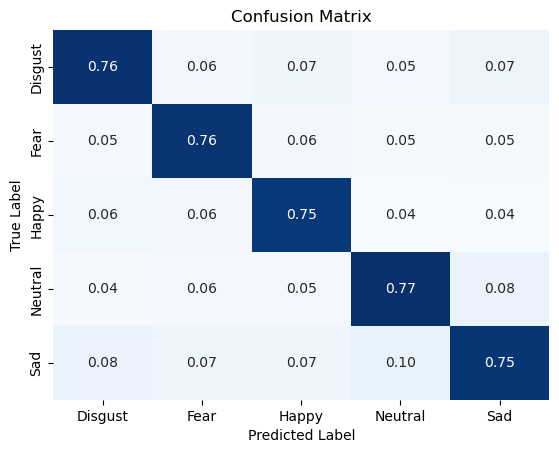

In [61]:
best_params =   clf.best_params_
# Create an MLP classifier with the best hyperparameters
mlp_model = MLPClassifier(**best_params)


mlp_model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_train_pca)


# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


# Get unique class labels
classes = sorted(set(y_train))


conf_mat = confusion_matrix(y_train, y_pred)

# Create a DataFrame for the confusion matrix with class names
conf_mat_df = pd.DataFrame(conf_mat, index=classes, columns=classes)

# Compute percentage of correct predictions for each column
column_sums = conf_mat_df.sum(axis=0)
percent_correct = conf_mat_df / column_sums

# Plot confusion matrix
sns.heatmap(percent_correct, annot=True, fmt='.2f', cmap='Blues', cbar=False)
#plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
#plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

Accuracy: 26.59%
Accuracy: 26.59%


Text(50.722222222222214, 0.5, 'True Label')

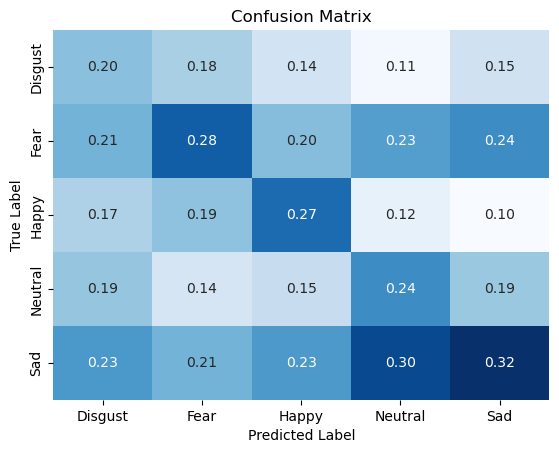

In [62]:
y_pred = mlp_model.predict(X_test_pca)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
conf_mat = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


# Create a DataFrame for the confusion matrix with class names
conf_mat_df = pd.DataFrame(conf_mat, index=classes, columns=classes)

# Compute percentage of correct predictions for each column
column_sums = conf_mat_df.sum(axis=0)
percent_correct = conf_mat_df / column_sums

# Plot confusion matrix
sns.heatmap(percent_correct, annot=True, fmt='.2f', cmap='Blues', cbar=False)
#plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
#plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [ ]:
#SVM Hyper Parameter Tuning
#train
svm_model = SVC(kernel='linear')

# Define the parameter grid for C
param_grid = {'C': 10.0 ** np.arange(-3, 5, 1)}

# Create a three-fold cross-validation object with explicit train-test splitting
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=kf, scoring='accuracy')
grid_search.fit(X_train_pca,y_train)
# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Accuracy: 34.65%


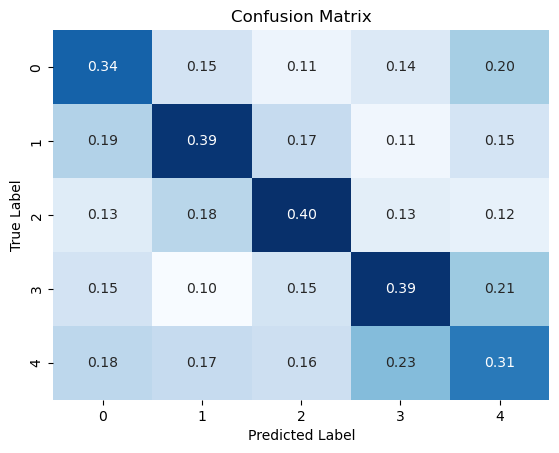

In [15]:
svm_model_optimal = SVC(kernel='linear',C = grid_search.best_params_['C'])
svm_model_optimal.fit(X_train_pca, y_train)
y_pred = svm_model_optimal.predict(X_train_pca)
accuracy = accuracy_score(y_train, y_pred)
conf_mat = confusion_matrix(y_train, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


# Create a DataFrame for the confusion matrix with class names
conf_mat_df = pd.DataFrame(conf_mat, index=classes, columns=classes)

# Compute percentage of correct predictions for each column
column_sums = conf_mat_df.sum(axis=0)
percent_correct = conf_mat_df / column_sums

# Plot confusion matrix
sns.heatmap(percent_correct, annot=True, fmt='.2f', cmap='Blues', cbar=False)
#plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
#plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

Accuracy: 29.47%


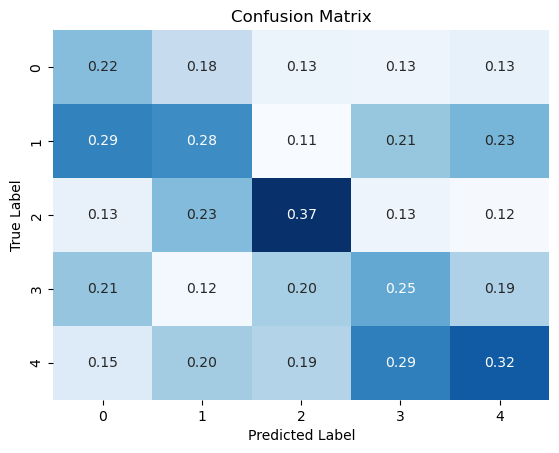

In [16]:
y_pred = svm_model_optimal.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Create a DataFrame for the confusion matrix with class names
conf_mat_df = pd.DataFrame(conf_mat, index=classes, columns=classes)

# Compute percentage of correct predictions for each column
column_sums = conf_mat_df.sum(axis=0)
percent_correct = conf_mat_df / column_sums

# Plot confusion matrix
sns.heatmap(percent_correct, annot=True, fmt='.2f', cmap='Blues', cbar=False)
#plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
#plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')